<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">👨‍💻Author: Muhammad Faheem Iqbal</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/FaheemAI1024)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadfaheemiqbal) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-faheem-iqbal-ai-solutions-architect-b630932ab/)  

[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/aammar.tufail) 
[![TikTok](https://img.shields.io/badge/TikTok-Profile-blue?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@data_scientist04?_t=8kW2bLg8CFl&_r=1)
[![HuggingFace](https://img.shields.io/badge/huggingface-Profile-yellow?style=for-the-badge&logo=huggingface)](https://huggingface.co/FaheemAi1024)

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://x.com/MFaheem113141?t=__88BWMyKGZcC08sw3SJtA&s=09) 
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/i_am_faheeeem?igsh=MXhlcG0zdTZ6Mnl5Yw==) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:faheemiqbalbwn2002@gmail.com)


In [1]:
print("Hello world")

Hello world


In [2]:
import pandas as pd
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns  

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset (update the file path if needed)
df = pd.read_csv('/kaggle/input/appartment-classify-10k/apartments_for_rent_classified_10K.csv', sep=';', encoding='cp1252')

print("Dataset Shape (Rows, Columns):", df.shape)

Dataset Shape (Rows, Columns): (10000, 22)


In [4]:
# 1. Basic structure of the dataset
print("\nColumns:")
df.columns.tolist()


Columns:


['id',
 'category',
 'title',
 'body',
 'amenities',
 'bathrooms',
 'bedrooms',
 'currency',
 'fee',
 'has_photo',
 'pets_allowed',
 'price',
 'price_display',
 'price_type',
 'square_feet',
 'address',
 'cityname',
 'state',
 'latitude',
 'longitude',
 'source',
 'time']

In [5]:
# 2. Data Types for each column
print("\nData Types:")
df.dtypes


Data Types:


id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [6]:
# 3. Display the first few rows to get a feel for the data

print("\nFirst 5 Rows:")
df.head()



First 5 Rows:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [7]:
# 4. Summary statistics for numerical columns and overall info
print("\nSummary Statistics for Numerical Columns:")
df.describe()


Summary Statistics for Numerical Columns:


,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [8]:
# For categorical columns, include object types in the description
print("\nSummary Statistics for All Columns (including categorical):")
df.describe(include='all')


Summary Statistics for All Columns (including categorical):


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
count,1.000000e+04,10000,10000,10000,6451,9966.000000,9993.000000,10000,10000,10000,...,10000,10000,10000.000000,6673,9923,9923,9990.000000,9990.000000,10000,1.000000e+04
unique,NaN,3,9350,9961,2254,NaN,NaN,1,1,3,...,1726,3,NaN,6658,1574,51,NaN,NaN,12,NaN
top,NaN,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,NaN,NaN,USD,No,Thumbnail,...,"$1,350",Monthly,NaN,908 8th SW St,Austin,TX,NaN,NaN,RentLingo,NaN
freq,NaN,9996,40,6,229,NaN,NaN,10000,10000,8907,...,86,9998,NaN,3,523,1737,NaN,NaN,6912,NaN
mean,5.623396e+09,NaN,NaN,NaN,NaN,1.380544,1.744021,NaN,NaN,NaN,...,NaN,NaN,945.810500,NaN,NaN,NaN,37.695162,-94.652247,NaN,1.574891e+09
std,7.021025e+07,NaN,NaN,NaN,NaN,0.615410,0.942354,NaN,NaN,NaN,...,NaN,NaN,655.755736,NaN,NaN,NaN,5.495851,15.759805,NaN,3.762395e+06
min,5.508654e+09,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,101.000000,NaN,NaN,NaN,21.315500,-158.022100,NaN,1.568744e+09
25%,5.509248e+09,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,649.000000,NaN,NaN,NaN,33.679850,-101.301700,NaN,1.568781e+09
50%,5.668610e+09,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,802.000000,NaN,NaN,NaN,38.809800,-93.651600,NaN,1.577358e+09
75%,5.668626e+09,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,1100.000000,NaN,NaN,NaN,41.349800,-82.209975,NaN,1.577359e+09


In [9]:
# 5. Check for missing values
print("\nMissing Values per Column:")
df.isnull().sum()


Missing Values per Column:


id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [10]:
# 6. Unique value counts for categorical columns (if any)
print("\nUnique Value Counts for Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # Displaying top 10 unique values



Unique Value Counts for Categorical Columns:

Column: category
category
housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

Column: title
title
Apartment in great location                            40
Super Cute! Apartment for Rent!                        32
Apartment in prime location                            31
This Apartment is a must see!                          27
Apartment in quiet area, spacious with big kitchen     26
One BR, One BA, safe neighborhood                      20
Two BR Apartment - Large & Bright                      18
Attractive One BR, One BA                              16
Prominence Apartments Two BR Luxury Apartment Homes    15
Great Central Location One BR, One BA                  14
Name: count, dtype: int64

Column: body
body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenie

In [11]:
# Optionally, save a CSV with this analysis summary
analysis_summary = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "dtypes": df.dtypes.to_dict(),
    "missing_values": df.isnull().sum().to_dict(),

}

In [12]:

# # Save summary to a CSV file if needed:
# summary_df = pd.DataFrame({
#     "Column": list(analysis_summary["dtypes"].keys()),
#     "DataType": list(analysis_summary["dtypes"].values()),
#     "MissingValues": [analysis_summary["missing_values"].get(col, 0) for col in analysis_summary["dtypes"].keys()]
# })
# summary_df.to_csv("dataset_summary.csv", index=False)
# print("\nA summary of the analysis has been saved to 'dataset_summary.csv'.")


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

# 2. Encoding and Normalization

In [14]:
# Optionally, if numeric_cols is not defined, select numeric columns automatically:
numeric_cols = df.select_dtypes(include=['number']).columns

# 4. Correlation Analysis

# Calculate the correlation matrix for the numerical columns
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   id  bathrooms  bedrooms     price  square_feet  latitude  \
id           1.000000  -0.046812  0.034394 -0.021587     0.008193 -0.061859   
bathrooms   -0.046812   1.000000  0.705856  0.411655     0.796557 -0.049920   
bedrooms     0.034394   0.705856  1.000000  0.306456     0.589194  0.024724   
price       -0.021587   0.411655  0.306456  1.000000     0.390771  0.015075   
square_feet  0.008193   0.796557  0.589194  0.390771     1.000000 -0.010772   
latitude    -0.061859  -0.049920  0.024724  0.015075    -0.010772  1.000000   
longitude   -0.187835  -0.000592  0.031177 -0.184250     0.021984 -0.106327   
time         0.999569  -0.048461  0.032311 -0.022298     0.006829 -0.062938   

             longitude      time  
id           -0.187835  0.999569  
bathrooms    -0.000592 -0.048461  
bedrooms      0.031177  0.032311  
price        -0.184250 -0.022298  
square_feet   0.021984  0.006829  
latitude     -0.106327 -0.062938  
longitude     1.000000

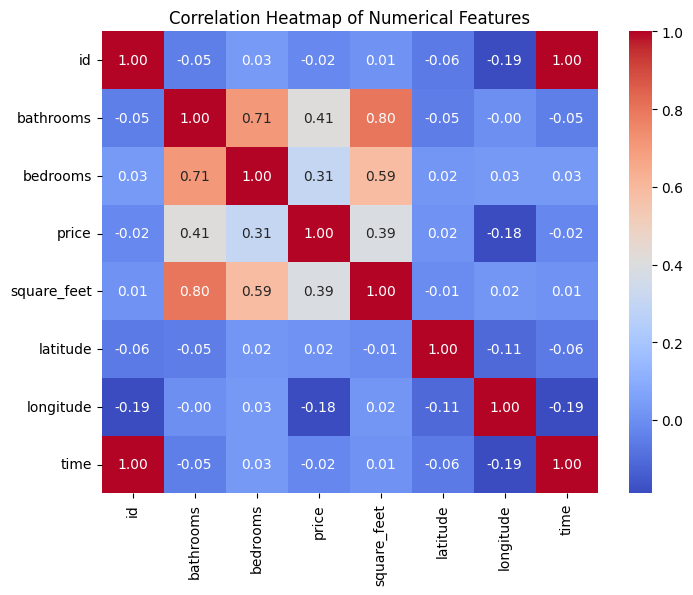

In [15]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### 1. Scatter Plots

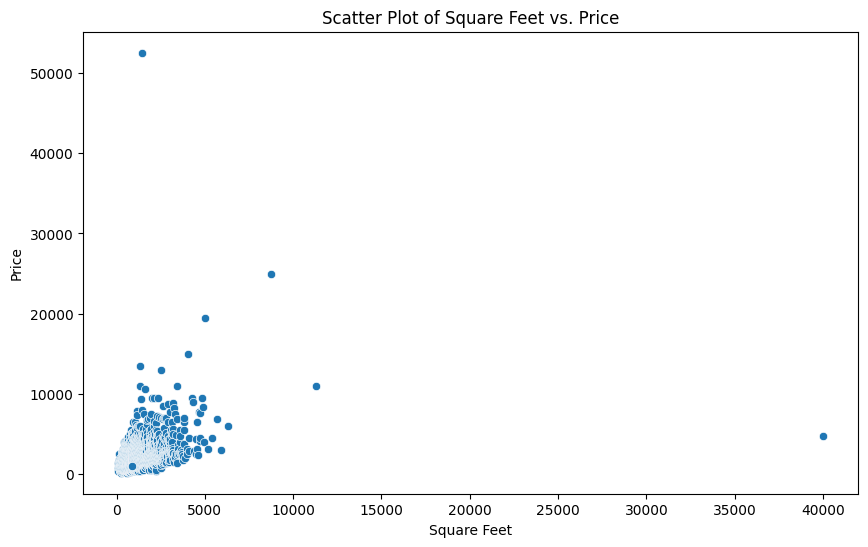

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_feet', y='price')
plt.title('Scatter Plot of Square Feet vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

### 2. Bubble Charts

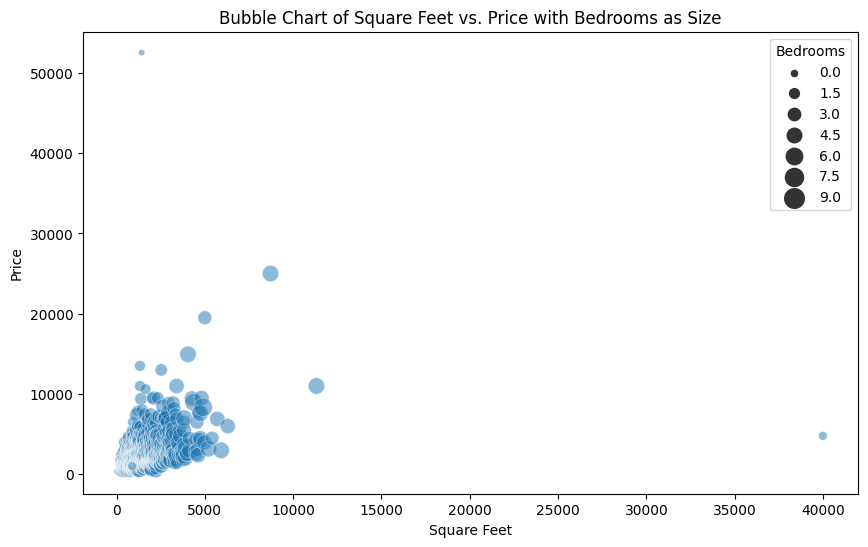

In [17]:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(data=df, x='square_feet', y='price', size='bedrooms', sizes=(20, 200), alpha=0.5)
  plt.title('Bubble Chart of Square Feet vs. Price with Bedrooms as Size')
  plt.xlabel('Square Feet')
  plt.ylabel('Price')
  plt.legend(title='Bedrooms', bbox_to_anchor=(1, 1))
  plt.show()

### 3. Heatmaps

### 4. Bar Charts for Pairwise Correlations

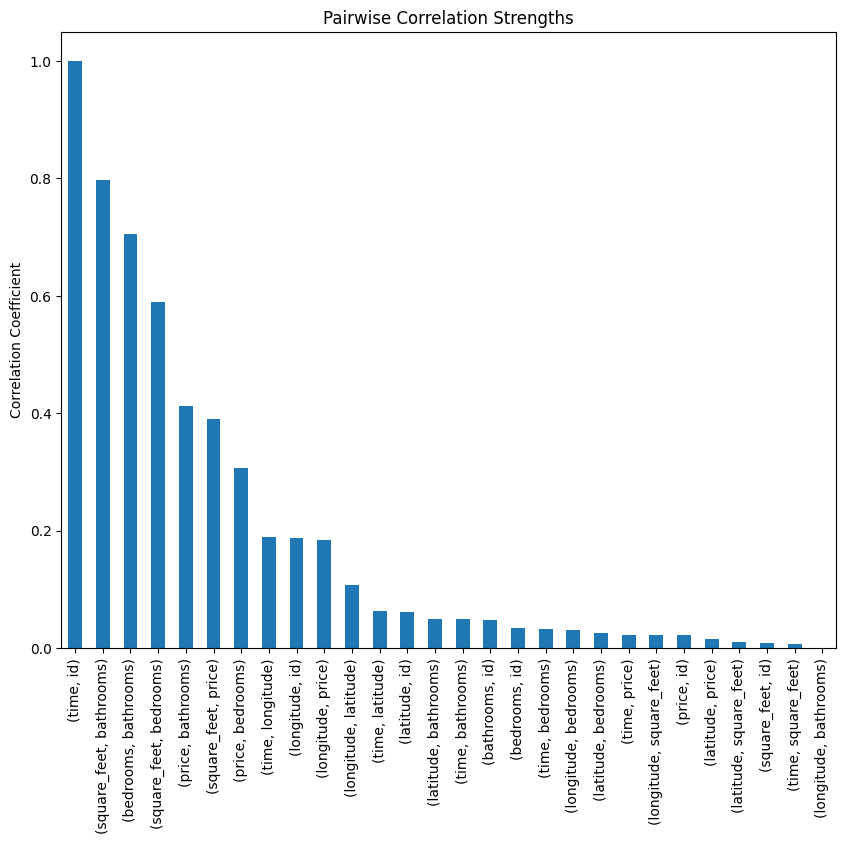

In [18]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr().abs()

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

sorted_pairs = upper_triangle.unstack().sort_values(ascending=False)
strongest_pairs = sorted_pairs[sorted_pairs.notnull()]

plt.figure(figsize=(10, 8))
strongest_pairs.plot(kind='bar')
plt.title('Pairwise Correlation Strengths')
plt.ylabel('Correlation Coefficient')
plt.show()

In [19]:
# 2. Drop truly useless / redundant columns
df = df.drop([
    'id',             # identifier
    'price_display',  # duplicate of price
    'currency', 'fee',# constant columns
    'address',        # too high-cardinality free text
    'body', 'title',  # drop text for tabular baseline
    'category'        # ~99.9% same value
], axis=1)

In [20]:
# 3. Feature engineering
# 3a. Price per square foot
df['price_per_sqft'] = df['price'] / df['square_feet']

# 3b. Time features
df['datetime'] = pd.to_datetime(df['time'], unit='s')
df['month']   = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['hour']    = df['datetime'].dt.hour

In [21]:
# 4. Missing‐value imputation
# 4a. Numerical
for col in ['bathrooms','bedrooms','latitude','longitude']:
    df[col] = df[col].fillna(df[col].median())

# 4b. Categorical
df['cityname']    = df['cityname'].fillna('Unknown')
df['state']       = df['state'].fillna('Unknown')
df['price_type']  = df['price_type'].fillna('Monthly')
df['has_photo']   = df['has_photo'].fillna('No')
df['source']      = df['source'].fillna('Other')

In [22]:
# 5. Encode “amenities” → binary flags for top 10
amen = (df['amenities']
        .fillna('')  # missing→empty
        .str.get_dummies(sep=','))
# keep only the top 10 most frequent amenities
top10 = amen.sum().sort_values(ascending=False).iloc[:10].index
df = pd.concat([df, amen[top10]], axis=1)
df = df.drop('amenities', axis=1)

In [23]:
# 6. Encode “pets_allowed” → two flags
pets = df['pets_allowed'].fillna('')
df['allows_cats'] = pets.str.contains('Cats').astype(int)
df['allows_dogs'] = pets.str.contains('Dogs').astype(int)
df = df.drop('pets_allowed', axis=1)

In [24]:
# 7. Frequency‐encode high‐cardinality categoricals
for col in ['cityname','state','source']:
    freq = df[col].value_counts(normalize=True)
    df[col + '_freq'] = df[col].map(freq)
df = df.drop(['cityname','state','source'], axis=1)

In [25]:
# 8. One‐hot encode low‐cardinality categoricals
df = pd.get_dummies(df,
                    columns=['price_type','has_photo'],
                    drop_first=True)

In [26]:
# 9. Outlier handling & transformations
# 9a. Clip extreme sqft and price_per_sqft to the 1–99 percentile
for col in ['square_feet','price_per_sqft']:
    lower, upper = df[col].quantile([0.01,0.99])
    df[col] = df[col].clip(lower, upper)

In [27]:
# 9b. Log‐transform skewed targets/features
df['log_price']     = np.log1p(df['price'])
df['log_sqft']      = np.log1p(df['square_feet'])
df['log_price_psf']= np.log1p(df['price_per_sqft'])

In [29]:
# 10. Final cleanup
df = df.drop(['time','datetime','price','square_feet','price_per_sqft'], axis=1)

# 11. Split into X / y
X = df.drop('log_price', axis=1)
y = df['log_price']  # model log‐rent to stabilize variance

# 12. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Prepared data shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Prepared data shapes: (8000, 28) (2000, 28) (8000,) (2000,)


# model

In [30]:
y_train_price = np.expm1(y_train)
y_test_price  = np.expm1(y_test)

# --- 2) Bin into 4 classes (0 = lowest rents, 3 = highest) ---
y_train_cl = pd.qcut(y_train_price, q=4, labels=False)
y_test_cl  = pd.qcut(y_test_price,  q=4, labels=False)

print("Class distribution (train):\n", np.bincount(y_train_cl))
print("Class distribution (test):\n",  np.bincount(y_test_cl))

Class distribution (train):
 [2049 1962 1992 1997]
Class distribution (test):
 [501 499 501 499]


In [31]:
# --- 3) Naïve Bayes (no hyper‐params) ---
nb = GaussianNB()
nb.fit(X_train, y_train_cl)
pred_nb = nb.predict(X_test)

print("\n=== Naïve Bayes ===")
print("Accuracy:", accuracy_score(y_test_cl, pred_nb))
print(classification_report(y_test_cl, pred_nb))


=== Naïve Bayes ===
Accuracy: 0.409
              precision    recall  f1-score   support

           0       0.73      0.13      0.22       501
           1       0.35      0.70      0.47       499
           2       1.00      0.00      0.00       501
           3       0.44      0.81      0.57       499

    accuracy                           0.41      2000
   macro avg       0.63      0.41      0.32      2000
weighted avg       0.63      0.41      0.32      2000



In [32]:
# --- 4) Decision Tree with GridSearchCV ---
dt_param_grid = {
    'max_depth':       [5, 10, 20, None],
    'min_samples_split':[2, 5, 10],
}
dt_gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
dt_gs.fit(X_train, y_train_cl)
best_dt = dt_gs.best_estimator_
pred_dt = best_dt.predict(X_test)

print("\n=== Decision Tree ===")
print("Best params:", dt_gs.best_params_)
print("Accuracy:", accuracy_score(y_test_cl, pred_dt))
print(classification_report(y_test_cl, pred_dt))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== Decision Tree ===
Best params: {'max_depth': 20, 'min_samples_split': 2}
Accuracy: 0.918
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       501
           1       0.87      0.91      0.89       499
           2       0.91      0.85      0.88       501
           3       0.97      0.93      0.95       499

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [33]:
# --- 5) Simple MLPClassifier with GridSearchCV ---
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'alpha':              [1e-4, 1e-3, 1e-2],
    'learning_rate':      ['constant', 'adaptive']
}
mlp_gs = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=42),
    mlp_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
mlp_gs.fit(X_train, y_train_cl)
best_mlp = mlp_gs.best_estimator_
pred_mlp = best_mlp.predict(X_test)

print("\n=== MLPClassifier ===")
print("Best params:", mlp_gs.best_params_)
print("Accuracy:", accuracy_score(y_test_cl, pred_mlp))
print(classification_report(y_test_cl, pred_mlp))

Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== MLPClassifier ===
Best params: {'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
Accuracy: 0.813
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       501
           1       0.71      0.79      0.75       499
           2       0.76      0.72      0.74       501
           3       0.97      0.81      0.88       499

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



In [38]:
import joblib

# Save all three trained models
joblib.dump(nb,       'naive_bayes_model.joblib')
joblib.dump(best_dt,  'decision_tree_model.joblib')
joblib.dump(best_mlp, 'mlp_classifier_model.joblib')

print("Models saved successfully!")

Models saved successfully!


##  Confusion Matrix Visualization

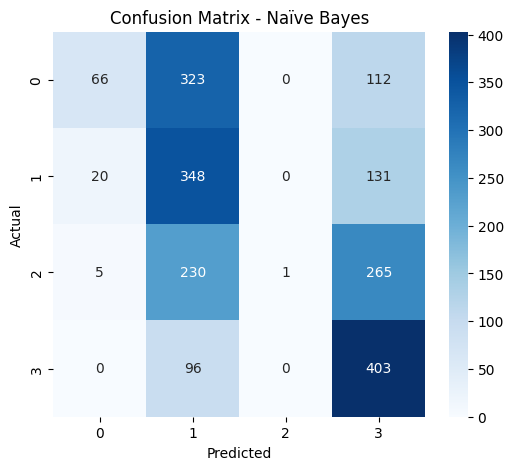

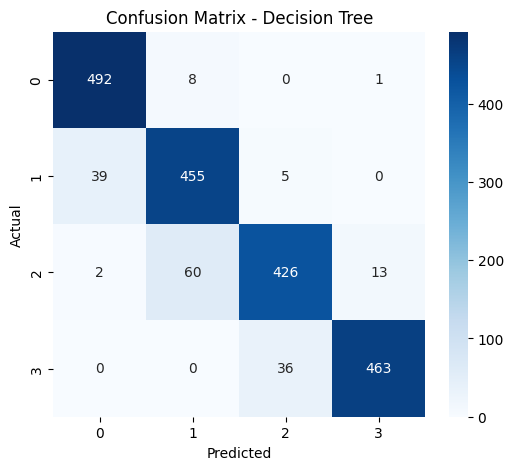

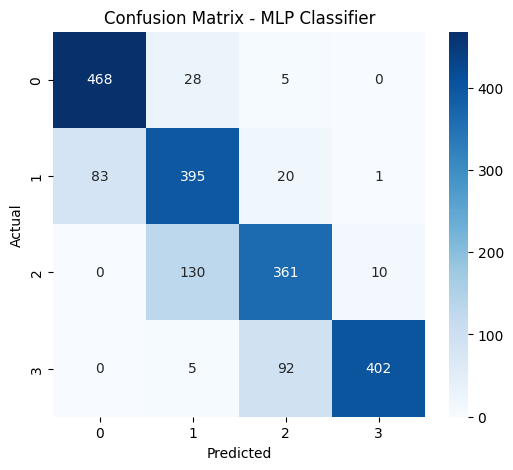

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

plot_confusion(y_test_cl, pred_nb,  "Naïve Bayes")
plot_confusion(y_test_cl, pred_dt,  "Decision Tree")
plot_confusion(y_test_cl, pred_mlp, "MLP Classifier")


## Cross-Validation Accuracy Distribution

In [39]:
# After GridSearchCV
cv_results = pd.DataFrame(dt_gs.cv_results_)
cv_results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).head()


,params,mean_test_score,std_test_score
6,"{'max_depth': 20, 'min_samples_split': 2}",0.941500,0.004586
9,"{'max_depth': None, 'min_samples_split': 2}",0.941500,0.004586
7,"{'max_depth': 20, 'min_samples_split': 5}",0.939625,0.003274
10,"{'max_depth': None, 'min_samples_split': 5}",0.939625,0.003274
8,"{'max_depth': 20, 'min_samples_split': 10}",0.938000,0.000919


##  ROC-AUC Score 

In [40]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test_cl, classes=[0, 1, 2, 3])
mlp_proba = best_mlp.predict_proba(X_test)
dt_proba = best_dt.predict_proba(X_test)

roc_mlp = roc_auc_score(y_test_bin, mlp_proba, average='macro', multi_class='ovr')
roc_dt  = roc_auc_score(y_test_bin, dt_proba, average='macro', multi_class='ovr')

print(f"MLP ROC-AUC: {roc_mlp:.3f}")
print(f"DT  ROC-AUC: {roc_dt:.3f}")


MLP ROC-AUC: 0.960
DT  ROC-AUC: 0.946


##  Classification Analysis

In [41]:
test_errors = X_test.copy()
test_errors['actual'] = y_test_cl
test_errors['pred_dt'] = pred_dt
test_errors['pred_mlp'] = pred_mlp
test_errors[ test_errors['actual'] != test_errors['pred_mlp'] ].head()

,bathrooms,bedrooms,latitude,longitude,month,weekday,hour,Parking,Dishwasher,Pool,...,source_freq,price_type_Monthly|Weekly,price_type_Weekly,has_photo_Thumbnail,has_photo_Yes,log_sqft,log_price_psf,actual,pred_dt,pred_mlp
6363,2.0,2.0,33.9136,-118.3527,9,1,23,1,1,0,...,0.2764,False,False,True,False,6.851185,1.081518,3,3,2
7487,1.0,2.0,40.7061,-111.9048,12,6,12,0,0,0,...,0.6912,False,False,True,False,7.003974,0.780159,2,2,1
7051,2.0,2.0,35.4751,-97.5035,9,2,4,1,0,1,...,0.2764,False,False,False,True,6.938284,0.971073,3,2,2
8158,2.0,2.0,39.2735,-76.8674,9,2,2,1,0,0,...,0.2764,False,False,False,True,7.095064,0.909462,3,3,2
8847,2.0,3.0,35.2441,-97.4144,9,2,3,0,0,0,...,0.2764,False,False,False,False,7.265430,0.590427,1,1,2
